In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.svm import SVC
# Set seed for reproducibility
SEED = 123

In [19]:
df = pd.read_csv('data.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [22]:
print('Data Shape',df.shape)

Data Shape (569, 33)


In [23]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)


In [24]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
print('Data Shape',df.shape)

Data Shape (569, 31)


In [26]:
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [28]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [29]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

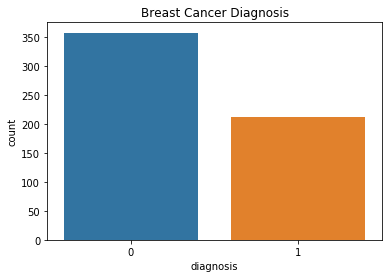

In [30]:
sns.countplot(x='diagnosis', data=df)
plt.title('Breast Cancer Diagnosis')
plt.show()

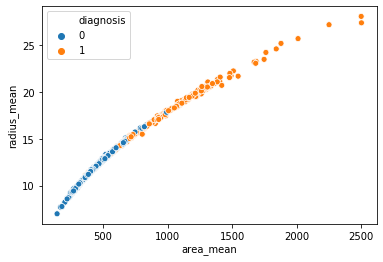

In [31]:
sns.scatterplot(x = 'area_mean', y = 'radius_mean', hue = 'diagnosis', data = df)
plt.show()

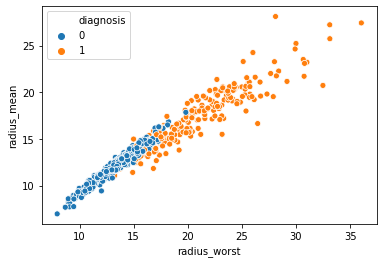

In [32]:
sns.scatterplot(x = 'radius_worst', y = 'radius_mean', hue = 'diagnosis', data = df)
plt.show()

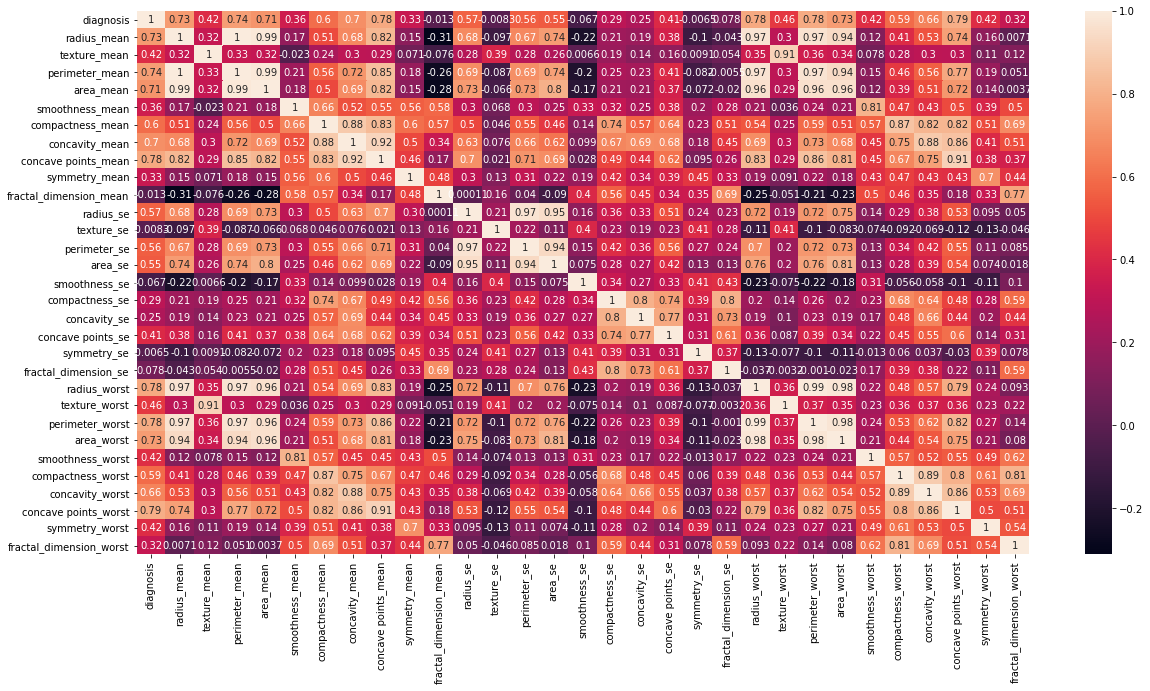

In [33]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True)
plt.show()

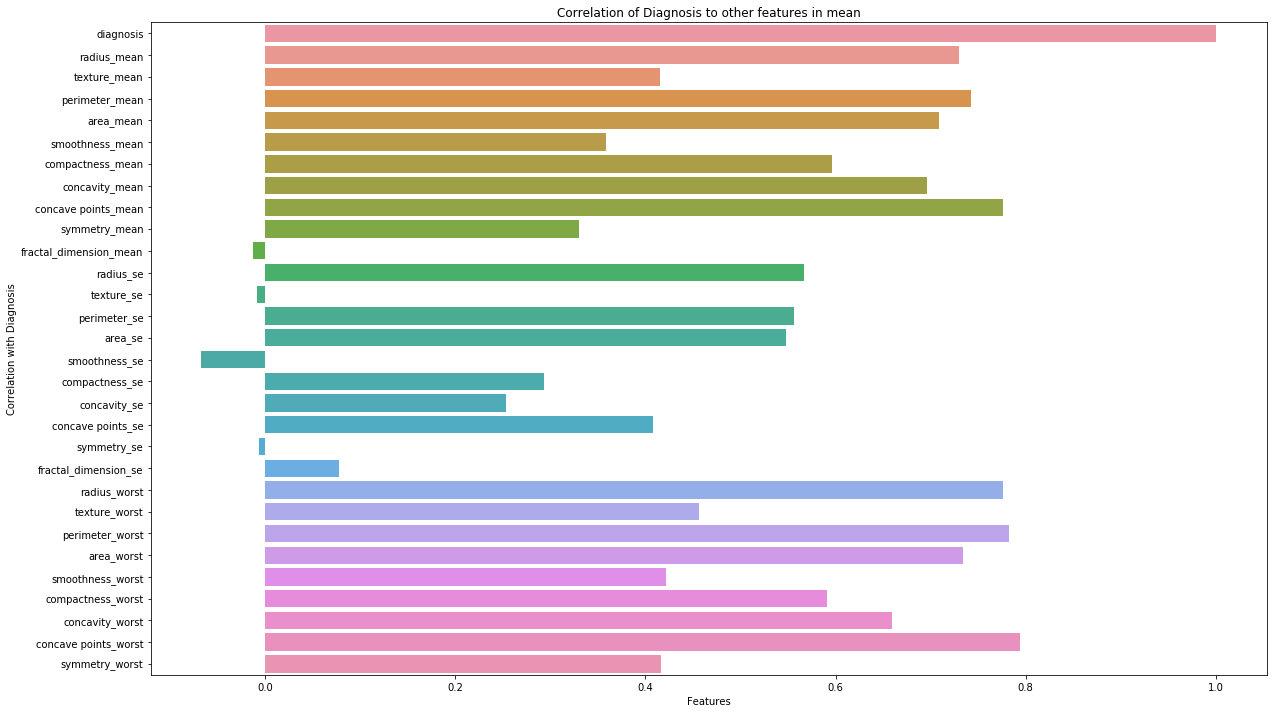

In [36]:
corr_target = (df[df.columns[0:]].corr()['diagnosis'][:-1]).to_frame()
plt.figure(1,figsize =(20,12))
sns.barplot(y = corr_target.index,x = corr_target['diagnosis'],data = corr_target, orient = "h")
plt.title('Correlation of Diagnosis to other features in mean')
plt.ylabel('Correlation with Diagnosis')
plt.xlabel('Features')
plt.show()

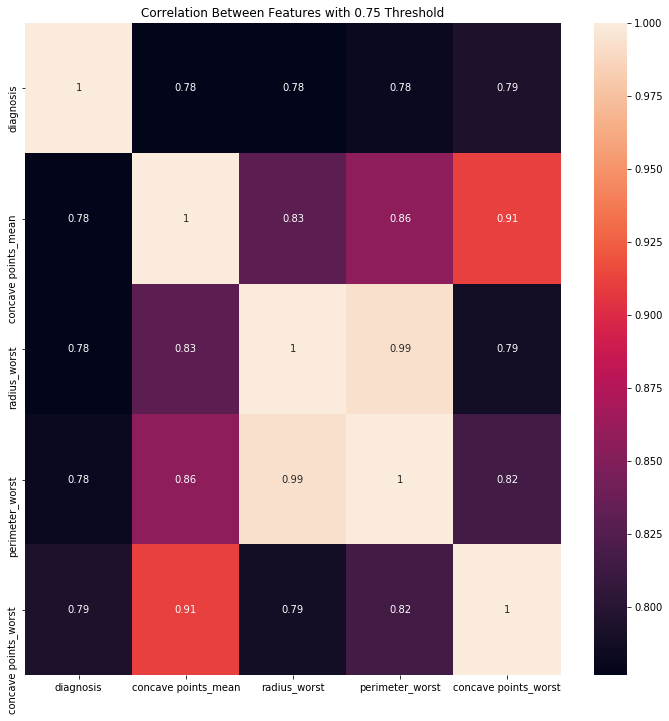

In [169]:
corr = df.corr()
plt.figure(figsize = (12,12))
thresh = 0.75
mask = np.abs(corr["diagnosis"]) > thresh
heavy_features = corr.columns[mask].tolist()
sns.heatmap(df[heavy_features].corr(),annot=True);
plt.title("Correlation Between Features with 0.75 Threshold");
plt.show();

In [171]:
print('Features that heavily influence diagnosis are: ', heavy_features)

Features that heavily influence diagnosis are:  ['diagnosis', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst']


In [172]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [173]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [153]:
# Split dataset into 70% train, 30% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=SEED)

In [154]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [155]:
DataFrame(X_train_norm).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,0.327120,0.312235,0.317731,0.208278,0.391434,0.244665,0.208841,0.243940,0.379576,0.270380,...,0.276962,0.356081,0.268054,0.162391,0.337761,0.230787,0.213977,0.391936,0.258041,0.238335
std,0.177224,0.154261,0.172977,0.147951,0.124859,0.164689,0.187488,0.190657,0.146339,0.155682,...,0.175681,0.168973,0.169697,0.140160,0.160640,0.164710,0.163579,0.221217,0.122867,0.143527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.198261,0.200952,0.190423,0.103890,0.301052,0.124146,0.070173,0.102957,0.274242,0.160120,...,0.154941,0.232928,0.148429,0.070886,0.221175,0.116339,0.093031,0.223170,0.178691,0.132269
50%,0.295200,0.294810,0.283314,0.167897,0.383858,0.208592,0.146790,0.166277,0.365152,0.240944,...,0.231781,0.347773,0.221087,0.117222,0.330012,0.188380,0.179553,0.335601,0.243249,0.208121
75%,0.422551,0.398356,0.410707,0.268708,0.468945,0.323612,0.286785,0.367048,0.454545,0.341933,...,0.369838,0.457085,0.366580,0.212609,0.427839,0.319355,0.302875,0.552749,0.309038,0.309300
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [156]:
# fit scaler on training data
stdscale = StandardScaler().fit(X_train)

# transform training data
X_train_std = stdscale.transform(X_train)

# transform testing dataabs
X_test_std = stdscale.transform(X_test)

In [157]:
DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,...,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-5.216375e-16,-5.467430e-17,-8.851100e-16,-2.518923e-16,1.779704e-16,-3.019639e-16,1.576070e-16,1.559333e-16,8.089565e-17,6.689233e-16,...,-1.645808e-16,-1.338962e-16,3.841149e-16,-5.244270e-17,5.645958e-16,-7.671139e-19,-8.331031e-17,-5.388626e-16,-5.495325e-17,5.007162e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,...,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.848126e+00,-2.026620e+00,-1.839155e+00,-1.409521e+00,-3.138956e+00,-1.487486e+00,-1.115294e+00,-1.281082e+00,-2.597079e+00,-1.738928e+00,...,-1.578488e+00,-2.109981e+00,-1.581593e+00,-1.160071e+00,-2.105247e+00,-1.402933e+00,-1.309746e+00,-1.773956e+00,-2.102806e+00,-1.662654e+00
25%,-7.280122e-01,-7.223062e-01,-7.369100e-01,-7.064490e-01,-7.247834e-01,-7.327193e-01,-7.405401e-01,-7.403884e-01,-7.206975e-01,-7.091281e-01,...,-6.954321e-01,-7.297470e-01,-7.058198e-01,-6.536805e-01,-7.266713e-01,-6.957213e-01,-7.403063e-01,-7.638585e-01,-6.466321e-01,-7.399274e-01
50%,-1.803404e-01,-1.131025e-01,-1.992191e-01,-2.732813e-01,-6.074581e-02,-2.193102e-01,-3.313764e-01,-4.078544e-01,-9.869251e-02,-1.893177e-01,...,-2.574975e-01,-4.922604e-02,-2.771189e-01,-3.226743e-01,-4.829589e-02,-2.577911e-01,-2.107111e-01,-2.549795e-01,-1.205463e-01,-2.107750e-01
75%,5.391499e-01,5.589866e-01,5.381796e-01,4.089560e-01,6.215714e-01,4.799786e-01,4.162547e-01,6.465186e-01,5.129458e-01,4.601912e-01,...,5.293268e-01,5.985083e-01,5.813327e-01,3.587465e-01,5.614545e-01,5.383995e-01,5.441423e-01,7.278604e-01,4.155794e-01,4.950571e-01
max,3.801555e+00,4.464066e+00,3.949247e+00,5.357972e+00,4.880172e+00,4.592208e+00,4.225106e+00,3.970554e+00,4.244976e+00,4.692497e+00,...,4.120808e+00,3.815589e+00,4.318687e+00,5.983636e+00,4.127707e+00,4.675974e+00,4.811215e+00,2.752178e+00,6.046304e+00,5.313463e+00


In [158]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

In [159]:
# Instantiate individual classifiers
lr = LogisticRegression(max_iter = 500, n_jobs=-1, random_state=SEED)
knn = KNN()
dt = DecisionTreeClassifier(random_state=SEED)
svc = SVC(kernel='rbf', probability = True, random_state=SEED)
rf = RandomForestClassifier(random_state=SEED)
xgb = XGBClassifier(random_state = 0)
ada = AdaBoostClassifier(random_state = 0)

# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('SVM', svc),
('Random Forest Classifier', rf),
('K Nearest Neighbours', knn),
('Decision Tree', dt),
('ADABoost', ada),
('XGBoost',xgb)]


In [174]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, (accuracy * 100.0)))

Logistic Regression : 98.246
SVM : 90.058
Random Forest Classifier : 98.246
K Nearest Neighbours : 92.982
Decision Tree : 94.152
ADABoost : 97.661
XGBoost : 97.076


In [175]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train_std, y_train)
    # Predict the labels of the test set
    y_pred = clf.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    # Evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, (accuracy * 100.0)))

Logistic Regression : 99.415
SVM : 98.246
Random Forest Classifier : 98.246
K Nearest Neighbours : 97.661
Decision Tree : 94.152
ADABoost : 97.661
XGBoost : 97.076


In [163]:
#LOGISTIC REGRESSION
# Get the probability of y_test records being = 1
y_test_prob_1 = lr.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_prob_1)

# Get the area under the curve (AUC)
roc_auc_lr = roc_auc_score(y_test, lr.predict(X_test_std))
print("(LR) ROC_AUC:",roc_auc_lr)

(LR) ROC_AUC: 0.9926470588235294


In [164]:
#SVC
# Get the probability of y_test records being = 1
y_test_prob_2 = svc.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_test_prob_2)

# Get the area under the curve (AUC)
roc_auc_svc = roc_auc_score(y_test, svc.predict(X_test_std))
print("(SVC) ROC_AUC:",roc_auc_svc)

(SVC) ROC_AUC: 0.98043974871502


In [141]:
#Random Forest
# Get the probability of y_test records being = 1
y_test_prob_3 = rf.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_test_prob_3)

# Get the area under the curve (AUC)
roc_auc_rf = roc_auc_score(y_test, rf.predict(X_test_std))
print("(RF) ROC_AUC:",roc_auc_rf)

(RF) ROC_AUC: 0.98043974871502


In [142]:
#KNN
# Get the probability of y_test records being = 1
y_test_prob_4 = knn.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_test_prob_4)

# Get the area under the curve (AUC)
roc_auc_knn = roc_auc_score(y_test, knn.predict(X_test_std))
print("(KNN) ROC_AUC:",roc_auc_knn)

(KNN) ROC_AUC: 0.9730868075385495


In [143]:
#Decision Trees
# Get the probability of y_test records being = 1
y_test_prob_5 = dt.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_test_prob_5)

# Get the area under the curve (AUC)
roc_auc_dt = roc_auc_score(y_test, dt.predict(X_test_std))
print("(DT) ROC_AUC:",roc_auc_dt)

(DT) ROC_AUC: 0.9389634494574529


In [144]:
#ADA
# Get the probability of y_test records being = 1
y_test_prob_6 = ada.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_test_prob_6)

# Get the area under the curve (AUC)
roc_auc_ada = roc_auc_score(y_test, ada.predict(X_test_std))
print("(ADA) ROC_AUC:",roc_auc_ada)

(ADA) ROC_AUC: 0.9755853797829812


In [145]:
#XGB
# Get the probability of y_test records being = 1
y_test_prob_7 = xgb.predict_proba(X_test_std)[:, 1]

# Use the metrics.roc_curve function to get the true positive rate (tpr) and false positive rate (fpr)
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_test_prob_7)

# Get the area under the curve (AUC)
roc_auc_xgb = roc_auc_score(y_test, xgb.predict(X_test_std))
print("Best(XGB) ROC_AUC:",roc_auc_xgb)

Best(XGB) ROC_AUC: 0.9682324386065106


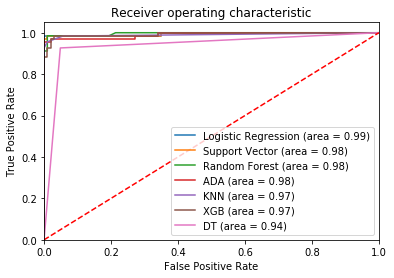

In [146]:
plt.plot(fpr1, tpr1, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr2, tpr2, label='Support Vector (area = %0.2f)' % roc_auc_svc)
plt.plot(fpr3, tpr3, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr6, tpr6, label='ADA (area = %0.2f)' % roc_auc_ada)
plt.plot(fpr4, tpr4, label='KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr7, tpr7, label='XGB (area = %0.2f)' % roc_auc_xgb)
plt.plot(fpr5, tpr5, label='DT (area = %0.2f)' % roc_auc_dt)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

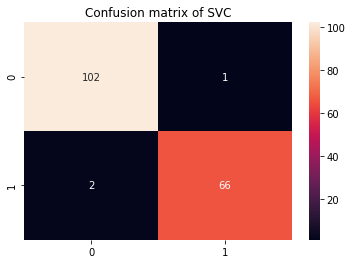

In [176]:
cm = confusion_matrix(y_test, svc.predict(X_test_std))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix of SVC");
plt.show()

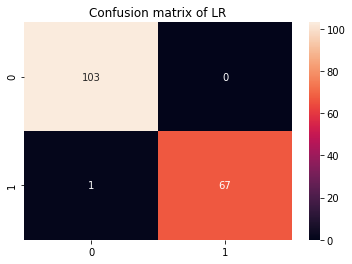

In [177]:
cm = confusion_matrix(y_test, lr.predict(X_test_std))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion matrix of LR");
plt.show()